In [19]:
import warnings
warnings.simplefilter("ignore")


In [20]:
import pandas as pd
import numpy as np

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [22]:
SUV_df=pd.read_csv("C:/Users/ganes/Downloads/SUV_Purchase.csv")

In [23]:
SUV_df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [24]:
SUV_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [25]:
SUV_df['EstimatedSalary'].mean()

69742.5

In [26]:
SUV_df['EstimatedSalary'].min()

15000

In [27]:
SUV_df['EstimatedSalary'].max()

150000

In [28]:
SUV_df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [29]:
SUV_df[SUV_df['Purchased']==1.000000]

,User ID,Gender,Age,EstimatedSalary,Purchased
7,15694829,Female,32,150000,1
16,15733883,Male,47,25000,1
17,15617482,Male,45,26000,1
18,15704583,Male,46,28000,1
19,15621083,Female,48,29000,1
...,...,...,...,...,...
393,15635893,Male,60,42000,1
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1


In [30]:
SUV_df[SUV_df['EstimatedSalary']==150000.000000]

,User ID,Gender,Age,EstimatedSalary,Purchased
7,15694829,Female,32,150000,1
211,15735878,Male,52,150000,1


In [31]:
SUV_df.isnull().sum()

User ID            0
Gender             0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [32]:
#check duplicate entries in the dataset
SUV_df.duplicated().sum()

0

<AxesSubplot:>

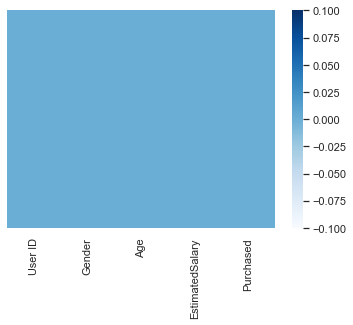

In [33]:
sns.heatmap(SUV_df.isnull(),yticklabels=False,cmap="Blues")

In [34]:
SUV_df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


In [35]:
SUV_df.columns

Index(['User ID', 'Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')

In [36]:
#displot combination of Matplotlib.hist function and seaborn kdeplot()
# KDE - kernel density estimate
plt.figure(figsize=(3,6))
for i in range(len(SUV_df.columns)):
    plt.subplot(4,i,i+1)
    sns.distplot(SUV_df[SUV_df.columns[i]],kde_kws={"color":"b","lw":3,"label":"KDE"},hist_kws={"color":"g"})
    
    
    plt.tight_layout()

ValueError: Number of columns must be a positive integer, not 0

<Figure size 216x432 with 0 Axes>

<AxesSubplot:>

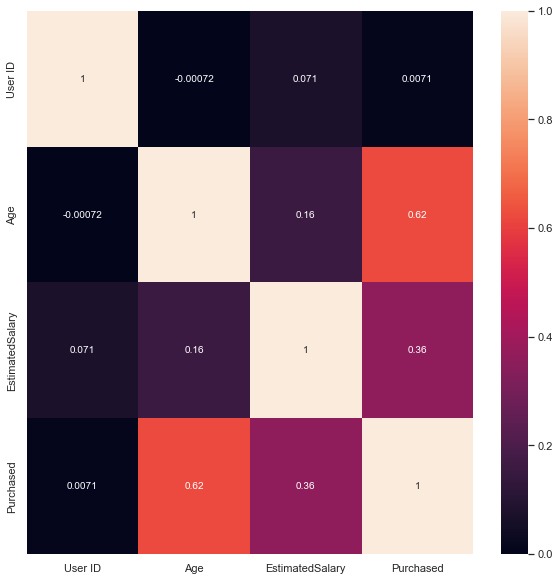

In [37]:
# correlations
correlations = SUV_df.corr()
f,ax=plt.subplots(figsize=(10,10))

sns.heatmap(correlations,annot=True)

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Purchased'>

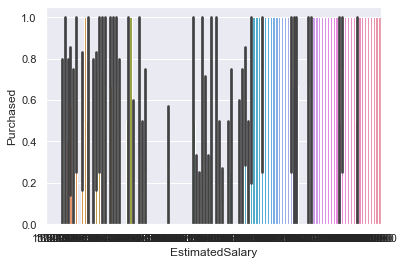

In [38]:
sns.barplot(SUV_df['EstimatedSalary'], SUV_df['Purchased'])



<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

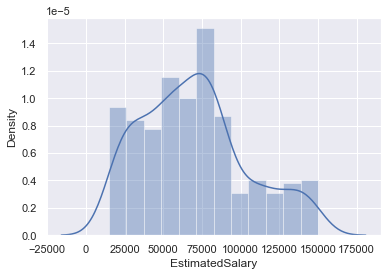

In [39]:
sns.distplot(SUV_df['EstimatedSalary'])

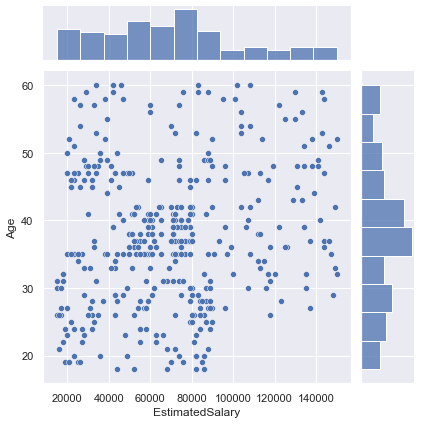

In [40]:
sns.jointplot(SUV_df['EstimatedSalary'], SUV_df['Age'])

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

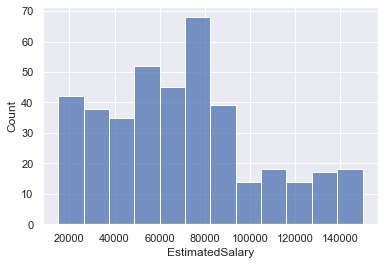

In [41]:
sns.histplot(SUV_df['EstimatedSalary'])

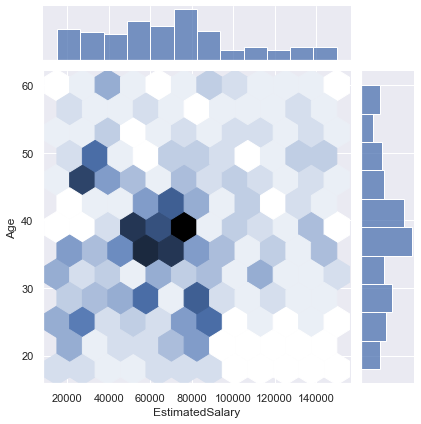

In [42]:
sns.jointplot(SUV_df['EstimatedSalary'], SUV_df['Age'], kind="hex")

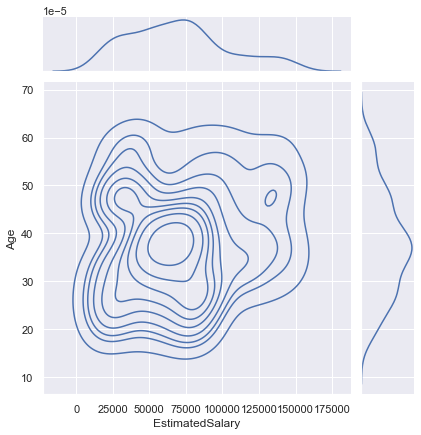

In [43]:
sns.jointplot(SUV_df['EstimatedSalary'], SUV_df['Age'], kind="kde")

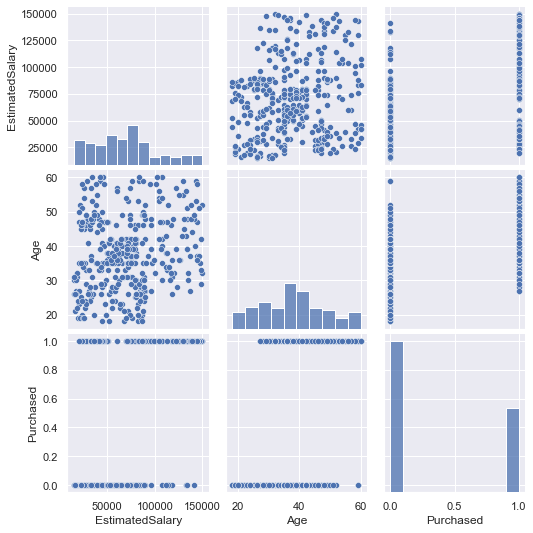

In [44]:
sns.pairplot(SUV_df[['EstimatedSalary','Age','Purchased']])


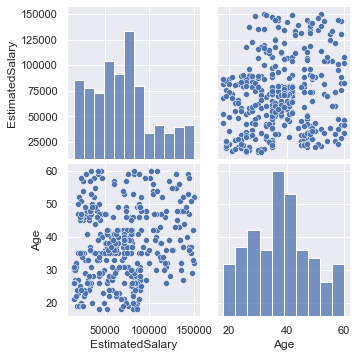

In [45]:
sns.pairplot(SUV_df[['EstimatedSalary', 'Age',]])

In [ ]:
sns.stripplot(SUV_df['Purchased'],  SUV_df['EstimatedSalary'])

In [ ]:
plt.figure(1, figsize=(15,6))
n=0
for x in ['Age', 'EstimatedSalary' , 'Purchased']:
    n += 1
    plt.subplot(1, 2, n)
    plt.subplots_adjust(hspace =0.5 , wspace = 0.5)
    sns.displot(SUV_df[x] , bins = 10)
    plt.title('Distplot of {}'.format(x))
plt.show()    

In [ ]:
plt.figure(figsize=(20,5))
sns.countplot(y='Gender',data=SUV_df)
plt.show()